# Environment setup

# Data analysis

## SEA Generator Stream

### Creating stream

In [95]:
from skmultiflow.data.sea_generator import SEAGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import metrics

sea_stream = SEAGenerator(classification_function = 3, balance_classes=True)
sea_stream.get_data_info()

'SEA Generator - 1 target(s), 2 classes, 3 features'

### Looking into dataframe created from partial stream data

In [2]:
df = pd.DataFrame()
N_SAMPLES = 10000

def generate_data(stream, n_features, n_samples):
    features = [[] for _ in range(n_features)]
    targets = []
    curr_samples = 0

    while curr_samples < n_samples:
        X, y = stream.next_sample()
        for i in range(n_features):
            features[i].append(X[0][0])
        targets.append(y[0])

        curr_samples += 1
    
    return features, targets

features, targets = generate_data(sea_stream, 3, N_SAMPLES)
sea_stream.restart()

df = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Target': targets})
df.head()

Feature 1  Feature 2  Feature 3  Target
0   6.205338   6.205338   6.205338       1
1   5.776473   5.776473   5.776473       0
2   7.237264   7.237264   7.237264       1
3   1.343054   1.343054   1.343054       0
4   4.772880   4.772880   4.772880       1

### Datatypes

In [3]:
df.dtypes

Feature 1    float64
Feature 2    float64
Feature 3    float64
Target         int64
dtype: object

### Statistics

In [4]:
df.describe(include='all')

Feature 1     Feature 2     Feature 3        Target
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       4.806003      4.806003      4.806003      0.500000
std        2.907104      2.907104      2.907104      0.500025
min        0.000031      0.000031      0.000031      0.000000
25%        2.261927      2.261927      2.261927      0.000000
50%        4.725743      4.725743      4.725743      0.500000
75%        7.293388      7.293388      7.293388      1.000000
max        9.999493      9.999493      9.999493      1.000000

### Plotting distributions inside dataframe

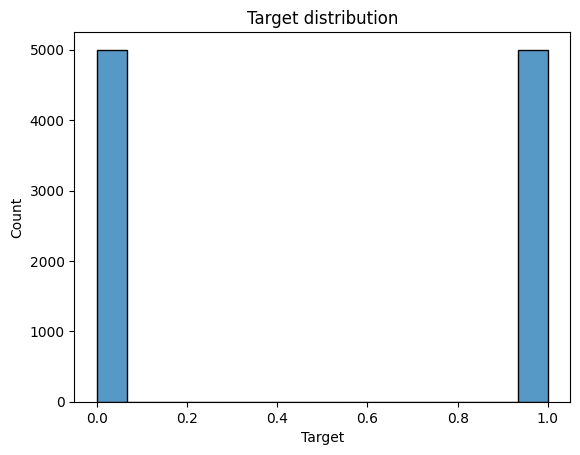

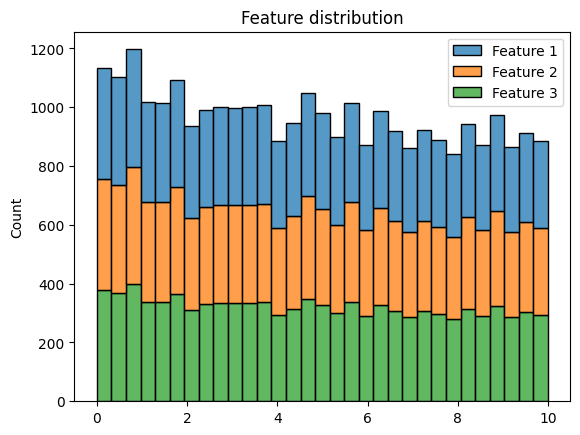

<Figure size 640x480 with 0 Axes>

In [5]:
g=sns.histplot(df['Target'])
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_sea_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(df.drop('Target', axis=1), multiple='stack')
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_sea_1.png', dpi=300, bbox_inches='tight')


### Plotting correlations between features

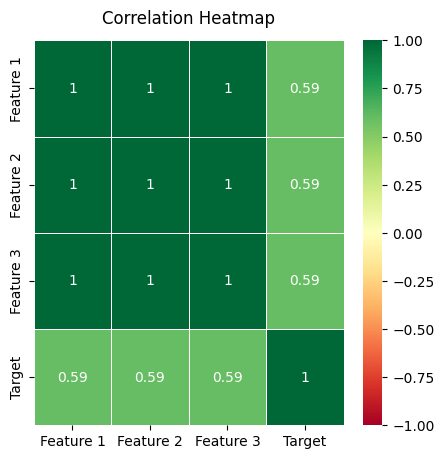

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map

g=sns.heatmap(df[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('correlation_heatmap_sea_1.png', dpi=300, bbox_inches='tight')

### Plotting distributions after sudden drift was generated

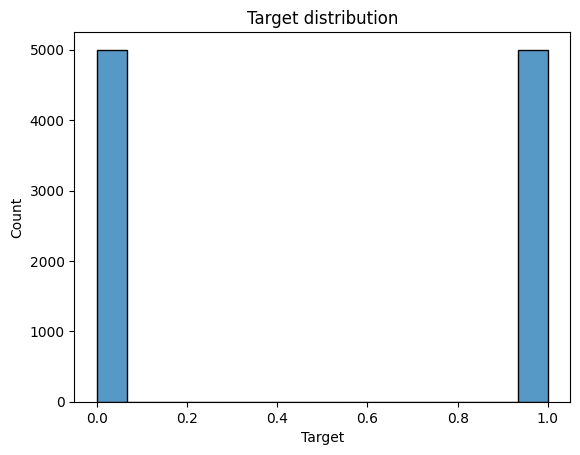

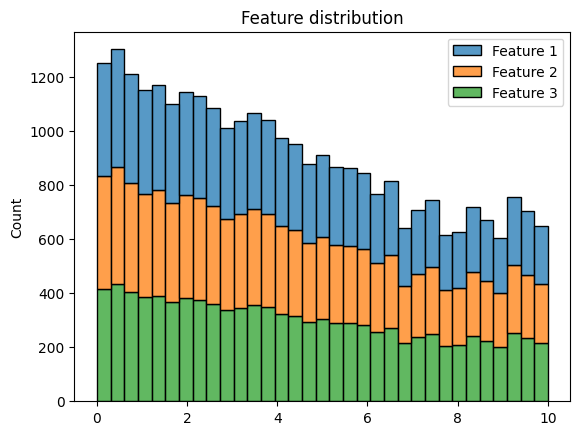

<Figure size 640x480 with 0 Axes>

In [7]:
sea_stream.generate_drift()
features, targets = generate_data(sea_stream, 3, N_SAMPLES)
df2 = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Target': targets})

sea_stream.restart()

g=sns.histplot(df2['Target'])
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_sea_2.png', dpi=300, bbox_inches='tight')

g=sns.histplot(df2.drop('Target', axis=1), multiple='stack')
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_sea_2.png', dpi=300, bbox_inches='tight')

### Plotting new correlations after drift was generated

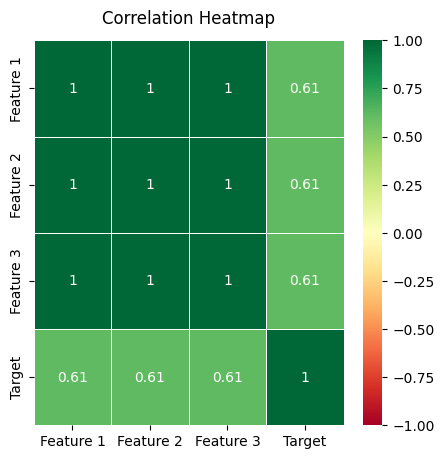

In [8]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map

g=sns.heatmap(df2[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('correlation_heatmap_sea_2.png', dpi=300, bbox_inches='tight')

## Hyperplane Generator Stream

### Creating stream

In [92]:
from skmultiflow.data import HyperplaneGenerator

hyperplane_stream = HyperplaneGenerator(random_state=1, n_features=10, n_drift_features=1, mag_change=0.66, sigma_percentage=0.25)

hyperplane_stream.get_data_info()

'Hyperplane Generator - 1 target(s), 2 classes, 10 features'

### Creating dataframe from partial stream data

In [25]:
features, targets = generate_data(hyperplane_stream, 10, N_SAMPLES)

df_hyplerplane = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Feature 4': features[3], 'Feature 5': features[4], 'Feature 6': features[5], 'Feature 7': features[6], 'Feature 8': features[7], 'Feature 9': features[8], 'Feature 10': features[9], 'Target': targets})

df_hyplerplane.head()

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   0.419195   0.419195   0.419195   0.419195   0.419195   0.419195   
1   0.313424   0.313424   0.313424   0.313424   0.313424   0.313424   
2   0.691877   0.691877   0.691877   0.691877   0.691877   0.691877   
3   0.908596   0.908596   0.908596   0.908596   0.908596   0.908596   
4   0.589306   0.589306   0.589306   0.589306   0.589306   0.589306   

   Feature 7  Feature 8  Feature 9  Feature 10  Target  
0   0.419195   0.419195   0.419195    0.419195       0  
1   0.313424   0.313424   0.313424    0.313424       0  
2   0.691877   0.691877   0.691877    0.691877       1  
3   0.908596   0.908596   0.908596    0.908596       1  
4   0.589306   0.589306   0.589306    0.589306       1

### Creating dataframe from next data batch

In [26]:
features_2, targets_2 = generate_data(hyperplane_stream, 10, N_SAMPLES)

df_hyplerplane_2 = pd.DataFrame({'Feature 1': features_2[0], 'Feature 2': features_2[1], 'Feature 3': features_2[2], 'Feature 4': features_2[3], 'Feature 5': features_2[4], 'Feature 6': features_2[5], 'Feature 7': features_2[6], 'Feature 8': features_2[7], 'Feature 9': features_2[8], 'Feature 10': features_2[9], 'Target': targets_2})

df_hyplerplane_2.head()

Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   0.325503   0.325503   0.325503   0.325503   0.325503   0.325503   
1   0.322689   0.322689   0.322689   0.322689   0.322689   0.322689   
2   0.271887   0.271887   0.271887   0.271887   0.271887   0.271887   
3   0.006149   0.006149   0.006149   0.006149   0.006149   0.006149   
4   0.600069   0.600069   0.600069   0.600069   0.600069   0.600069   

   Feature 7  Feature 8  Feature 9  Feature 10  Target  
0   0.325503   0.325503   0.325503    0.325503       0  
1   0.322689   0.322689   0.322689    0.322689       0  
2   0.271887   0.271887   0.271887    0.271887       0  
3   0.006149   0.006149   0.006149    0.006149       1  
4   0.600069   0.600069   0.600069    0.600069       1

### Plotting distributions of dataframe

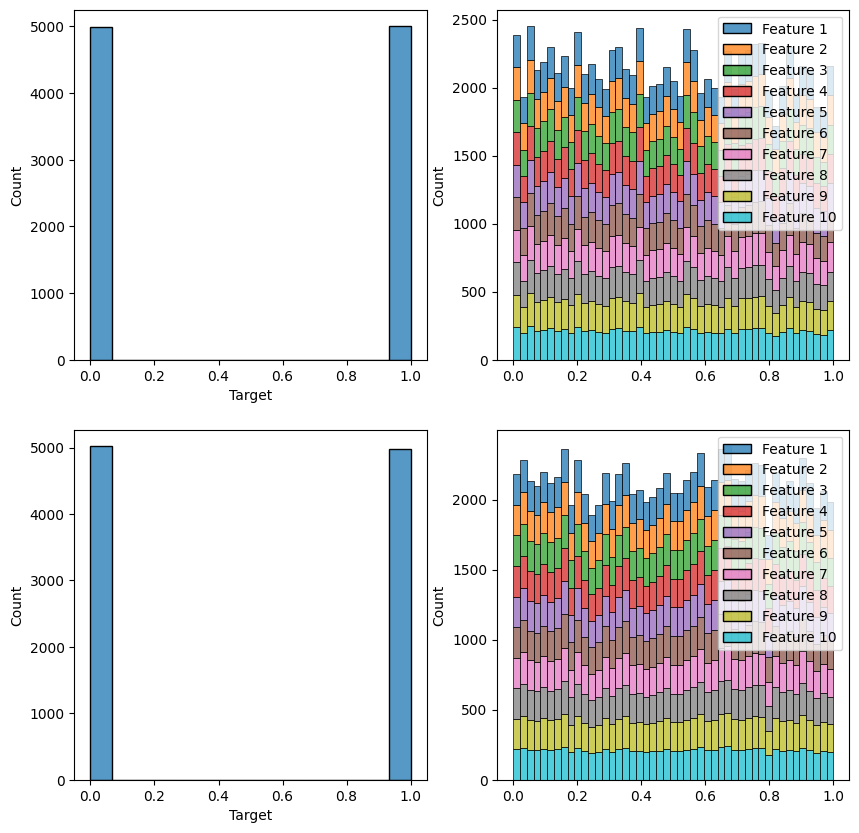

In [34]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(ax=axes[0, 0], data=df_hyplerplane['Target'])
sns.histplot(ax=axes[0, 1], data=df_hyplerplane.drop('Target', axis=1), multiple='stack')
sns.histplot(ax=axes[1, 0], data=df_hyplerplane_2['Target'])
sns.histplot(ax=axes[1, 1], data=df_hyplerplane_2.drop('Target', axis=1), multiple='stack')

plt.savefig('hyperplane_distribution.png', dpi=300, bbox_inches='tight')


### Plotting correlations

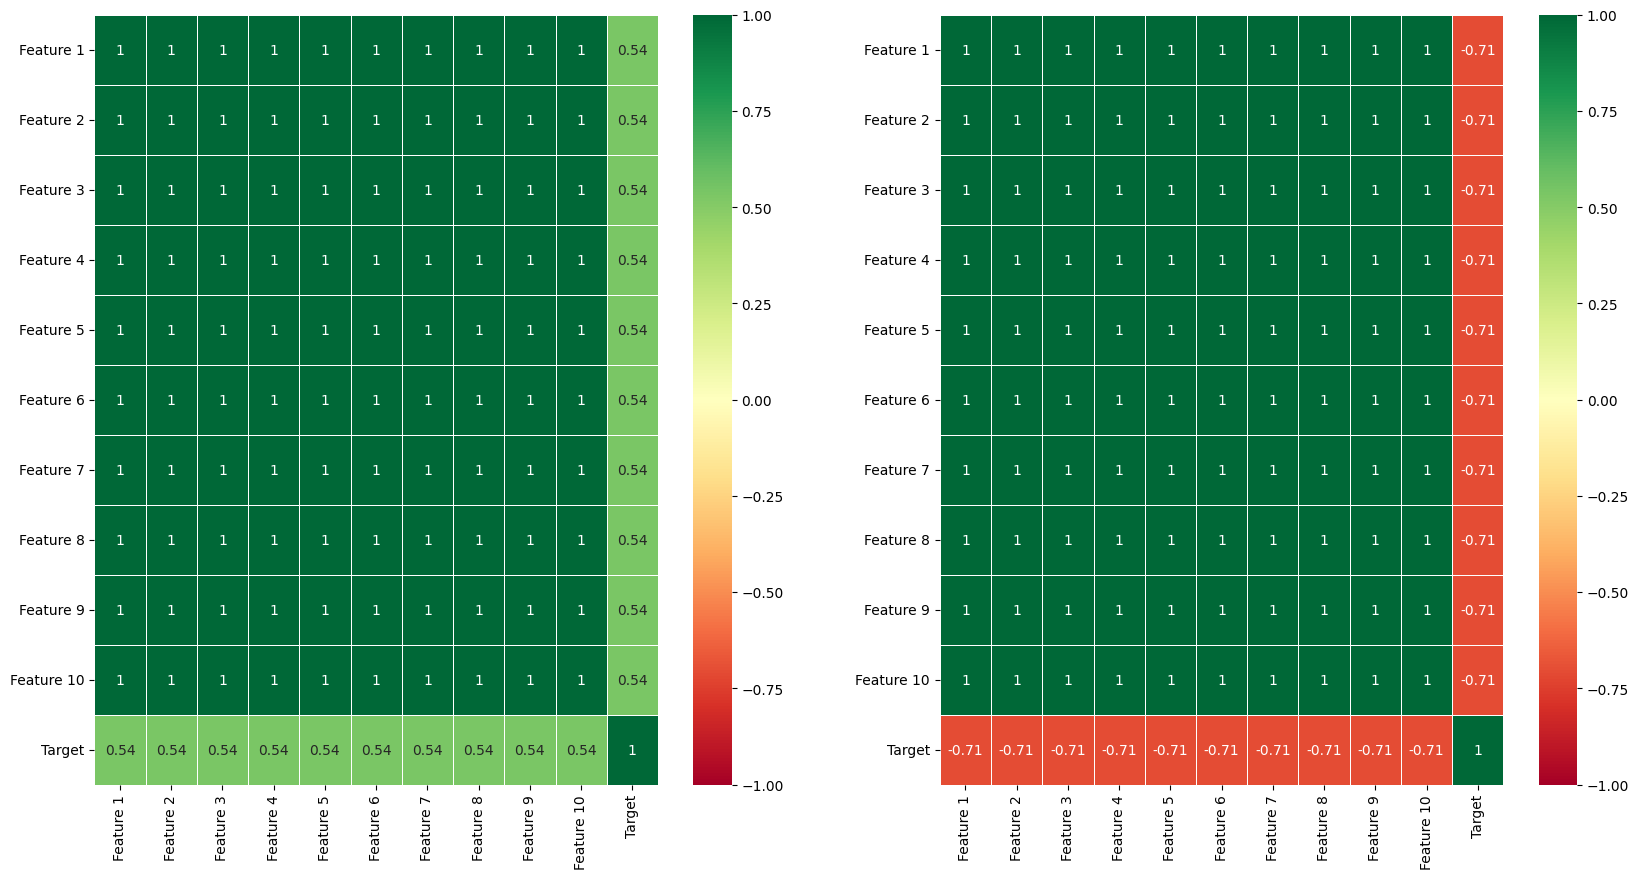

In [41]:
corrmat = df_hyplerplane.corr()
top_corr_features = corrmat.index

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(df_hyplerplane[top_corr_features].corr(), ax=axes[0], vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)

corrmat = df_hyplerplane_2.corr()
top_corr_features = corrmat.index

sns.heatmap(df_hyplerplane_2[top_corr_features].corr(), ax=axes[1], vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)

plt.savefig('hyperplane_corr.png', dpi=300, bbox_inches='tight')




## Covertype dataset analysis

### Covertype dataframe

In [36]:
from streams import build_data_stream

covertype_bunch = build_data_stream('covtype', as_data_frame=True)
covertype_df = covertype_bunch['frame']
covertype_df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0          135.0   
3          238.0           238.0          122.0   
4          220.0           234.0          150.0   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                              6279.0  ...           0.0           0.0   
1                              6225.0  ...           0.0           0.0   
2                              6121.0  ...           0.0           0.0   
3                              6211.0  ...           0.0           0.0   
4                              6172.0  ...           0.0           0.0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_38  Soil_Type_39  Cover_Type  
0           0.0           0.0           5  
1           0.0           0.0           5  
2           0.0           0.0           2  
3           0.0           0.0           2  
4           0.0           0.0           5  

[5 rows x 55 columns]

### Plotting features and targets inside dataframe

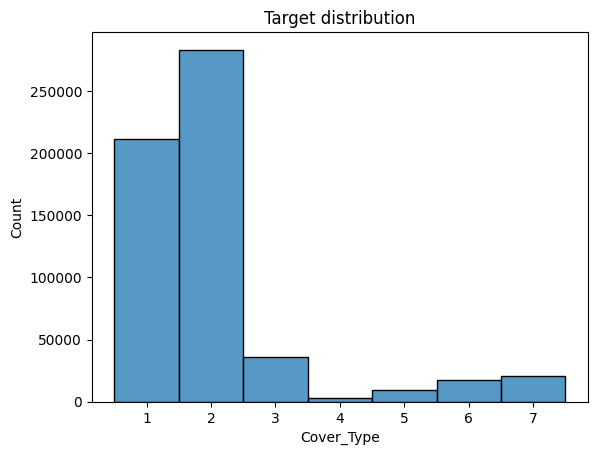

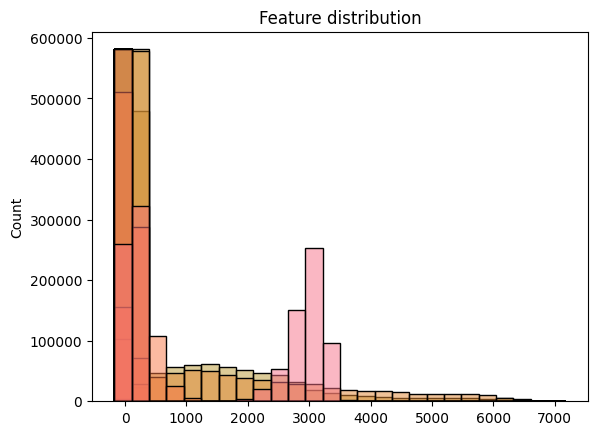

<Figure size 640x480 with 0 Axes>

In [14]:
g=sns.histplot(covertype_df['Cover_Type'], discrete=True)
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_covertype_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(covertype_df.drop('Cover_Type', axis=1), legend=False)
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_covertype_1.png', dpi=300, bbox_inches='tight')

### Creating covertype stream

In [90]:
from skmultiflow.data import DataStream

covertype_stream = DataStream(data=covertype_df.drop('Cover_Type', axis=1).to_numpy(), y=covertype_df['Cover_Type'].to_numpy())

covertype_stream.get_data_info()

'1 target(s), 7 classes'

### Plotting distributions of a partial stream

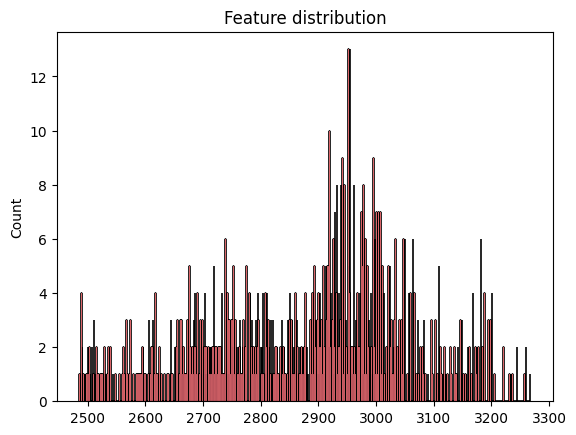

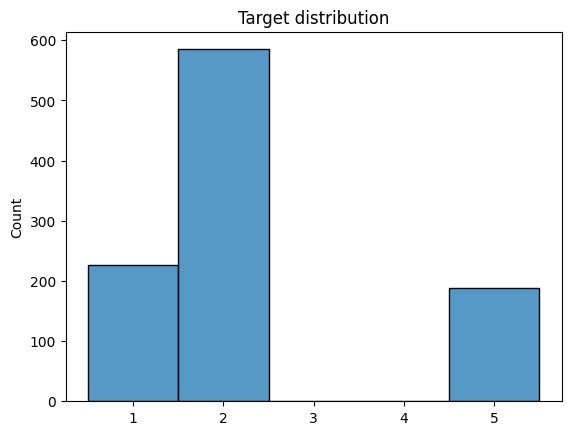

<Figure size 640x480 with 0 Axes>

In [16]:
features, targets = generate_data(covertype_stream, 54, 1000)

g=sns.histplot(features, discrete=True, legend=False)
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_covertype_stream_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(targets, discrete=True)
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_covertype_stream_1.png', dpi=300, bbox_inches='tight')

### Timeline of labels

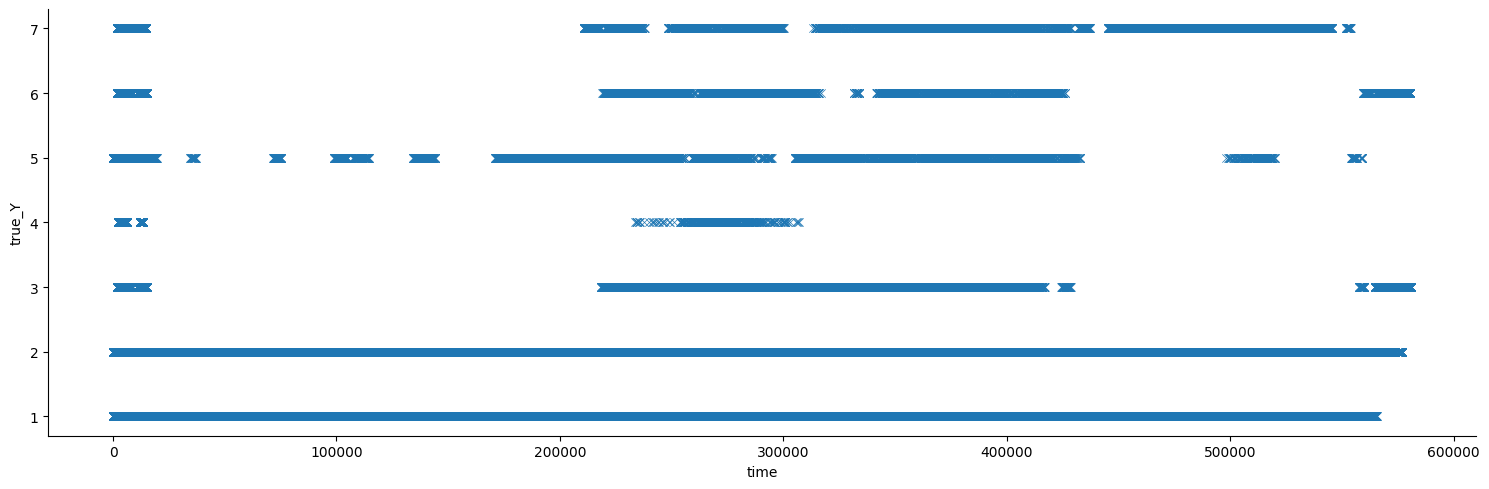

In [119]:
# get true_Y from df
true_Y = covertype_df['Cover_Type'].to_numpy()
sns.relplot(data=pd.DataFrame({'true_Y': true_Y, 'time': range(len(true_Y))}), x='time', y='true_Y', marker='x', aspect=3)

# Experiment-related functions

In [103]:
from sklearn.metrics import classification_report
from skmultiflow.drift_detection import ADWIN

def fully_fit_experiment_loop(classifier, n_samples, n_features, stream, generate_drift=None):
    curr_samples = 0
    predicted_Y = []
    true_Y = []

    while curr_samples < n_samples and stream.has_more_samples():
        X, y = stream.next_sample()

        if curr_samples % 1000 == 0 and generate_drift:
            stream.generate_drift()

        prediction  = classifier.predict(X)
        predicted_Y.append(prediction[0])
        true_Y.append(y[0])

        #classifier.partial_fit(X, y, classes=stream.target_values)
        curr_samples += 1

    return predicted_Y, true_Y

def partially_fit_experiment_loop(classifier, reset_classifier, n_samples, stream):
    curr_samples = 0
    batch_size = 0
    batch = []
    predicted_Y = []
    true_Y = []
    retrain_set = []
    drift_detector = ADWIN()
    drift_in_warning_zone = False


    while curr_samples < n_samples and stream.has_more_samples():
        X, y = stream.next_sample()

        batch_size += 1
        batch.append((X, y))

        if len(retrain_set) > 1000:
            retrain_set.pop(0)

        drift_detector.add_element(int(y[0] == classifier.predict(X)[0]))

        if not drift_in_warning_zone and drift_detector.detected_warning_zone():
            drift_in_warning_zone = True
        elif drift_in_warning_zone and drift_detector.detected_change():
            drift_in_warning_zone = False
        if drift_detector.detected_change():
            classifier = reset_classifier()
            for X, y in retrain_set:
                classifier.partial_fit(X, y, classes=stream.target_values)
        if drift_in_warning_zone:
            retrain_set.append((X, y))

        if batch_size == 10:
            for X, y in batch:
                prediction  = classifier.predict(X)
                predicted_Y.append(prediction[0])
                true_Y.append(y[0])
            batch = []
            classifier.partial_fit(X, y, classes=stream.target_values)
            batch_size = 0

        curr_samples += 1


    return predicted_Y, true_Y
   
def show_classification_report(predicted_Y, true_Y):
    unique_Y = np.unique(np.concatenate((predicted_Y, true_Y)))
    metrics = classification_report(true_Y, predicted_Y, labels=unique_Y, output_dict=True)
    metrics_df = pd.DataFrame(metrics).transpose()

    g=sns.heatmap(metrics_df, vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
    g.set_title('Classification Report', fontdict={'fontsize':12}, pad=12)
    
    gmean = np.sqrt(metrics_df['precision']['weighted avg'] * metrics_df['recall']['weighted avg'])
    print('Gmean: ', gmean)
    print(metrics_df)

    return metrics, g

# Single classifiers

In [66]:
from skmultiflow.drift_detection import DDM, ADWIN
from skmultiflow.drift_detection.eddm import EDDM
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
from skmultiflow.evaluation import EvaluatePrequential
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gaussian NB (Full fit)

In [105]:
stream = sea_stream
stream.restart()

classifier = GaussianNB()
X, y = stream.next_sample(25000)
classifier.fit(X, y)

GaussianNB()

### Experiment loop, training plot

Gmean:  0.944182591607332
              precision    recall  f1-score       support
0              0.945703  0.942472  0.944084  250000.00000
1              0.942668  0.945888  0.944275  250000.00000
accuracy       0.944180  0.944180  0.944180       0.94418
macro avg      0.944185  0.944180  0.944180  500000.00000
weighted avg   0.944185  0.944180  0.944180  500000.00000


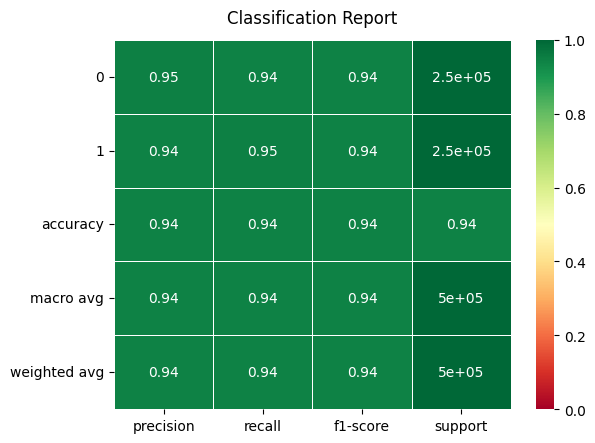

In [106]:
def sea_drift(stream):
  stream.generate_drift()

predicted_Y, true_Y = fully_fit_experiment_loop(classifier, 500000, 54, stream)

metrics_gnb, g_gnb = show_classification_report(predicted_Y, true_Y)
plt.savefig('output/gnb_fully_500k_covertype.png', dpi=300, bbox_inches='tight')

## MLP (Full fit)

In [116]:
stream = hyperplane_stream
stream.restart()

classifier = MLPClassifier()
X, y = stream.next_sample(25000)
classifier.fit(X, y)

MLPClassifier()

### Experiment loop, training plot

Gmean:  0.5920360845067799
              precision    recall  f1-score        support
0              0.592351  0.592034  0.592193  250163.000000
1              0.591721  0.592038  0.591879  249837.000000
accuracy       0.592036  0.592036  0.592036       0.592036
macro avg      0.592036  0.592036  0.592036  500000.000000
weighted avg   0.592036  0.592036  0.592036  500000.000000


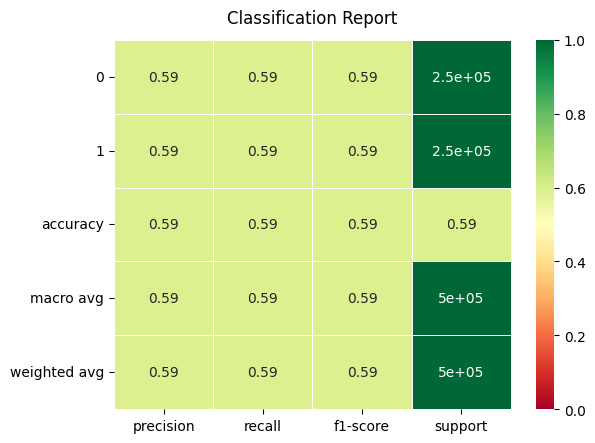

In [117]:
predicted_Y, true_Y = fully_fit_experiment_loop(classifier, 500000, 54, stream)

metrics_mlp, g_mlp = show_classification_report(predicted_Y, true_Y)

plt.savefig('output/mlp_fully_500k_hyperplane.png', dpi=300, bbox_inches='tight')

### GNB and MLP Comparison

<Axes: >

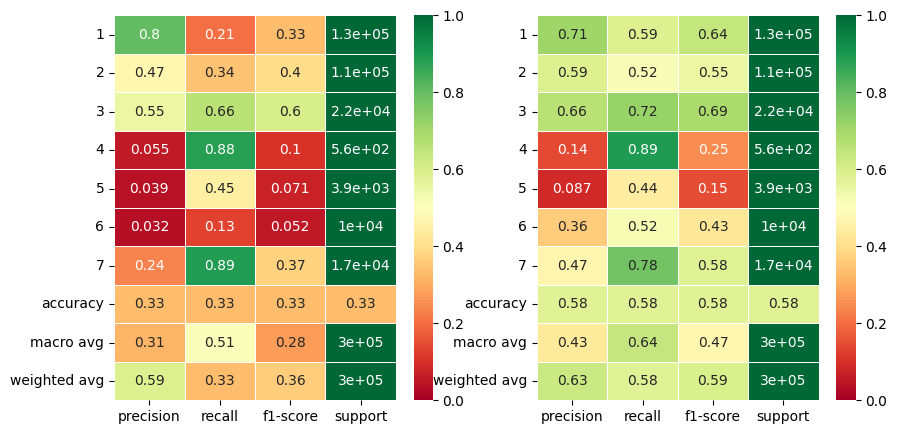

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(pd.DataFrame(metrics_gnb).transpose(), vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5, ax=axes[0])
sns.heatmap(pd.DataFrame(metrics_mlp).transpose(), vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5, ax=axes[1])

axes[0].set_title('Gaussian Naive Bayes', fontdict={'fontsize':12}, pad=12)
axes[1].set_title('Multi-layer Perceptron', fontdict={'fontsize':12}, pad=12)

### Timeline of labels used to test

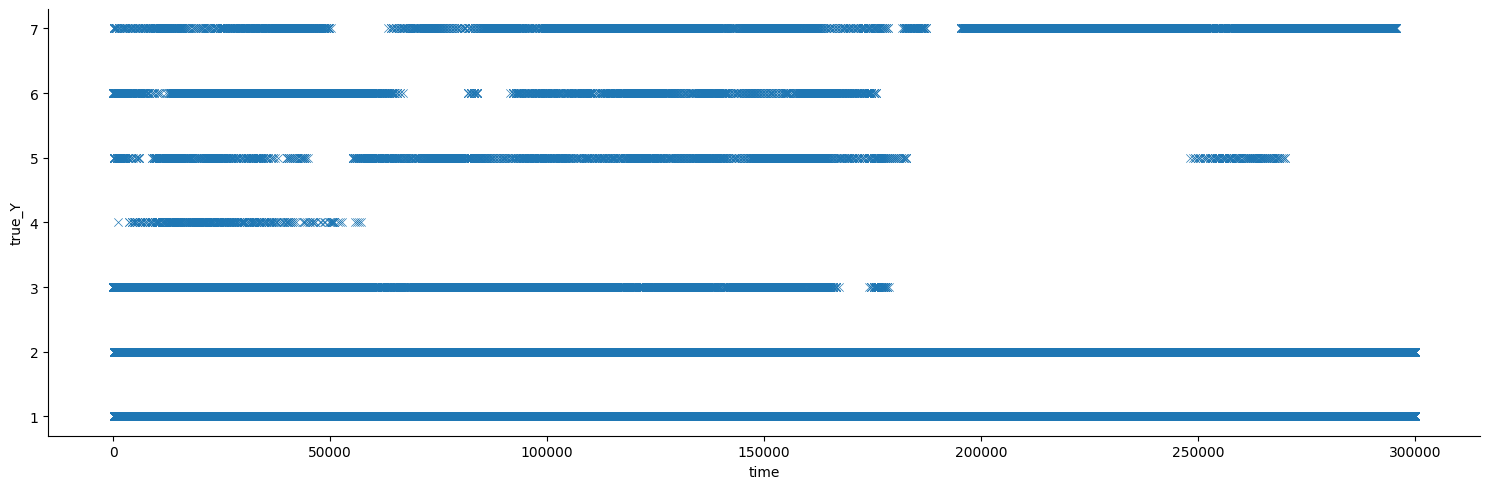

In [118]:
sns.relplot(data=pd.DataFrame({'true_Y': true_Y, 'time': range(len(true_Y))}), x='time', y='true_Y', marker='x', aspect=3)

## Interleave test-than-train on GNB and MLP classifiers

In [7]:
covertype_stream.restart()
cls_gnb = GaussianNB()
cls_mlp = MLPClassifier(random_state=1, max_iter=300)

X, y = covertype_stream.next_sample(5000)
cls_gnb.partial_fit(X, y, classes=covertype_stream.target_values)

evaluator = EvaluatePrequential(
    max_samples=500000,
    max_time=1000,
    show_plot=False,
    n_wait=100,
    restart_stream=False,
    metrics=['accuracy', 'precision', 'gmean', 'recall', 'f1', 'true_vs_predicted'],
    data_points_for_classification=True,
    output_file='output/covertype_gnb_mlp_prequential.csv'
)

evaluator.evaluate(stream=covertype_stream, model=[cls_gnb, cls_mlp], model_names=['GNB', 'MLP'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [899.36s]
Processed samples: 500000
Mean performance:
GNB - Accuracy     : 0.5884
GNB - Precision: 0.3450
GNB - Recall: 0.4444
GNB - F1 score: 0.3650
MLP - Accuracy     : 0.5859
MLP - Precision: 0.4884
MLP - Recall: 0.2675
MLP - F1 score: 0.2966


[GaussianNB(), MLPClassifier(max_iter=300, random_state=1)]

In [3]:
# load data/covertype_gnb_mlp_prequential.csv

df_gnb_mlp = pd.read_csv('output/covertype_gnb_mlp_prequential.csv', index_col=0)
df_gnb_mlp.head()


mean_acc_[GNB]  current_acc_[GNB]  mean_acc_[MLP]  current_acc_[MLP]  \
id                                                                          
200        1.000000               1.00        0.000000               0.00   
201        0.500000               0.50        0.000000               0.00   
299        0.570000               0.57        0.190000               0.19   
399        0.625000               0.68        0.310000               0.43   
499        0.576667               0.48        0.356667               0.45   

     mean_precision_[GNB]  current_precision_[GNB]  mean_precision_[MLP]  \
id                                                                         
200              0.333333                 0.333333              0.000000   
201              0.250000                 0.250000              0.000000   
299              0.477065                 0.477065              0.101071   
399              0.474691                 0.445089              0.138251   
499              0.465743                 0.326814              0.160805   

     current_precision_[MLP]  mean_gmean_[GNB]  current_gmean_[GNB]  ...  \
id                                                                   ...   
200                 0.000000               0.0                  0.0  ...   
201                 0.000000               0.0                  0.0  ...   
299                 0.101071               0.0                  0.0  ...   
399                 0.169304               0.0                  0.0  ...   
499                 0.194239               0.0                  0.0  ...   

     current_recall_[GNB]  mean_recall_[MLP]  current_recall_[MLP]  \
id                                                                   
200              0.333333           0.000000              0.000000   
201              0.250000           0.000000              0.000000   
299              0.489881           0.089881              0.089881   
399              0.541061           0.126477              0.156276   
499              0.444444           0.152789              0.225694   

     mean_f1_[GNB]  current_f1_[GNB]  mean_f1_[MLP]  current_f1_[MLP]  \
id                                                                      
200       0.333333          0.333333       0.000000          0.000000   
201       0.250000          0.250000       0.000000          0.000000   
299       0.453011          0.453011       0.094026          0.094026   
399       0.465001          0.442247       0.131631          0.162392   
499       0.454865          0.364525       0.155206          0.197194   

     true_value  predicted_value_[GNB]  predicted_value_[MLP]  
id                                                             
200         5.0                    5.0                    7.0  
201         1.0                    2.0                    7.0  
299         3.0                    3.0                    7.0  
399         6.0                    3.0                    2.0  
499         6.0                    3.0                    6.0  

[5 rows x 23 columns]

Text(0.5, 1.0, 'F1')

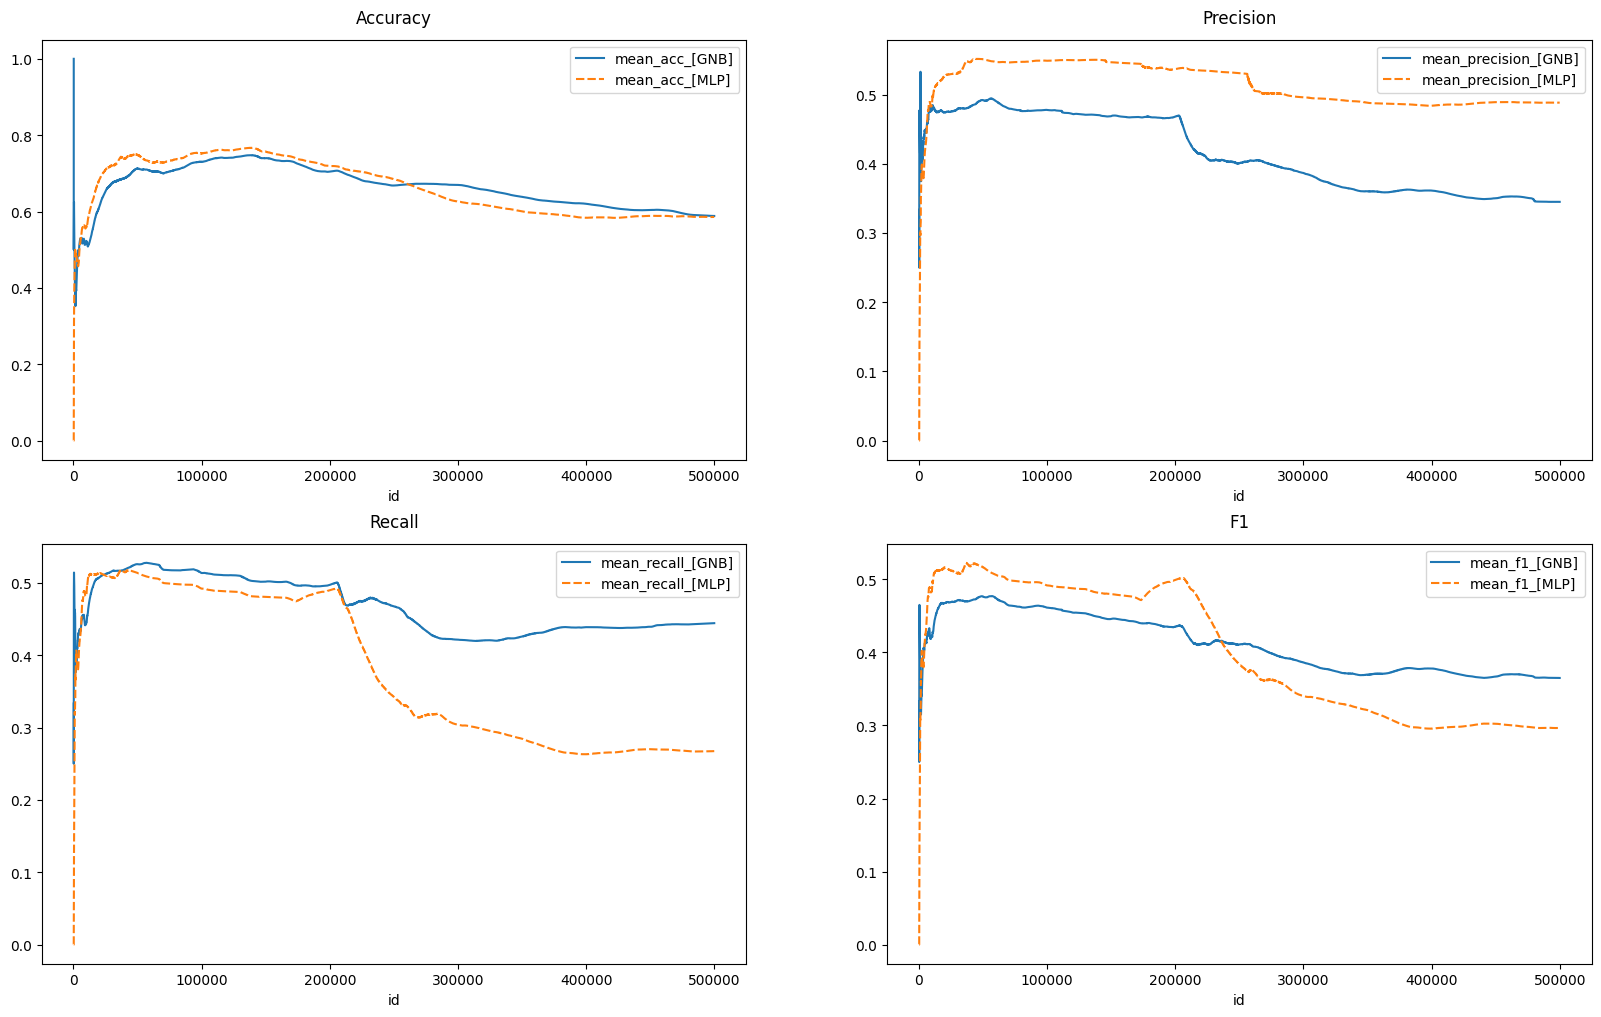

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.lineplot(ax=axes[0, 0], data=df_gnb_mlp[['mean_acc_[GNB]', 'mean_acc_[MLP]']])
axes[0, 0].set_title('Accuracy', fontdict={'fontsize':12}, pad=12)
sns.lineplot(ax=axes[0, 1], data=df_gnb_mlp[['mean_precision_[GNB]', 'mean_precision_[MLP]']])
axes[0, 1].set_title('Precision', fontdict={'fontsize':12}, pad=12)
sns.lineplot(ax=axes[1, 0], data=df_gnb_mlp[['mean_recall_[GNB]', 'mean_recall_[MLP]']])
axes[1, 0].set_title('Recall', fontdict={'fontsize':12}, pad=12)
sns.lineplot(ax=axes[1, 1], data=df_gnb_mlp[['mean_f1_[GNB]', 'mean_f1_[MLP]']])
axes[1, 1].set_title('F1 Score', fontdict={'fontsize':12}, pad=12)


Gmean:  0.6170059996877001
              precision    recall  f1-score    support
1.0            0.627279  0.539802  0.580262  1721.0000
2.0            0.749057  0.614076  0.674883  2586.0000
3.0            0.474729  0.992453  0.642247   265.0000
4.0            0.777778  0.368421  0.500000    19.0000
5.0            0.122642  0.173333  0.143646    75.0000
6.0            0.075758  0.101351  0.086705   148.0000
7.0            0.255639  0.731183  0.378830   186.0000
accuracy       0.590200  0.590200  0.590200     0.5902
macro avg      0.440412  0.502946  0.429511  5000.0000
weighted avg   0.645029  0.590200  0.603529  5000.0000


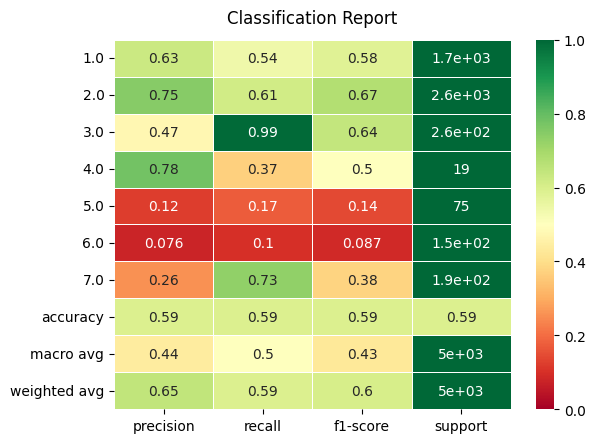

In [31]:
# gather predicted and true labels for each model
predicted_Y_gnb = df_gnb_mlp['predicted_value_[GNB]'].to_numpy()
true_Y = df_gnb_mlp['true_value'].to_numpy()

metrics_gnb, g = show_classification_report(predicted_Y_gnb, true_Y)


Gmean:  0.579196944133426
              precision    recall  f1-score    support
1.0            0.541373  0.490413  0.514634  1721.0000
2.0            0.620514  0.755607  0.681430  2586.0000
3.0            0.316456  0.283019  0.298805   265.0000
4.0            0.666667  0.210526  0.320000    19.0000
5.0            0.500000  0.066667  0.117647    75.0000
6.0            0.764706  0.087838  0.157576   148.0000
7.0            0.545455  0.064516  0.115385   186.0000
accuracy       0.581400  0.581400  0.581400     0.5814
macro avg      0.565024  0.279798  0.315068  5000.0000
weighted avg   0.577002  0.581400  0.557346  5000.0000


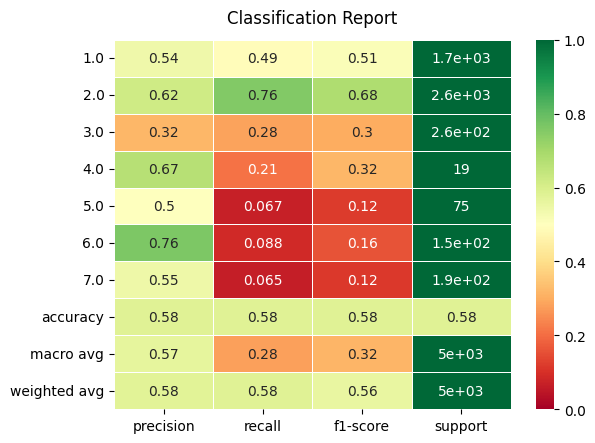

In [32]:
predicted_Y_mlp = df_gnb_mlp['predicted_value_[MLP]'].to_numpy()

metrics_mlp, g = show_classification_report(predicted_Y_mlp, true_Y)

Text(0.5, 1.0, 'Multi-layer Perceptron')

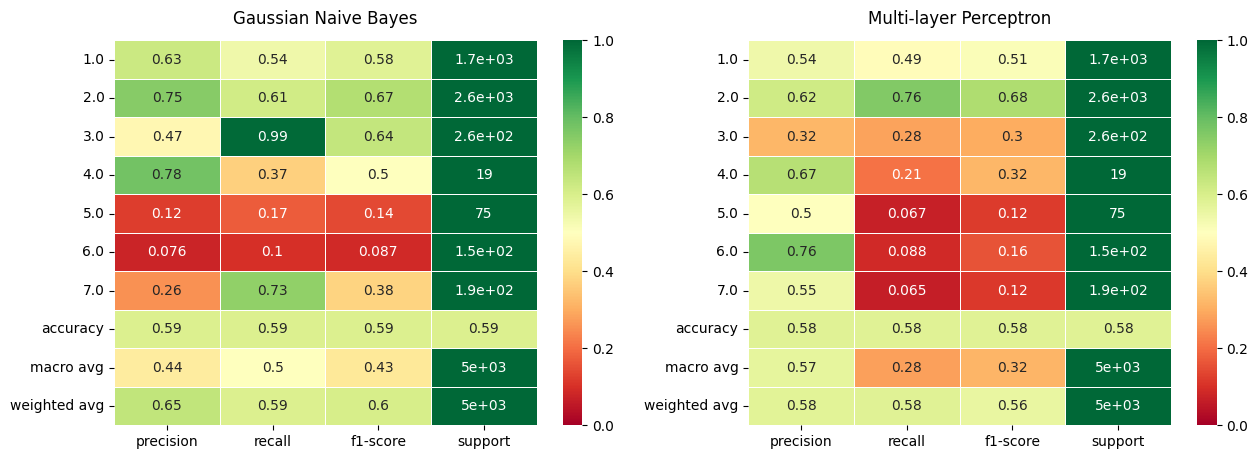

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(pd.DataFrame(metrics_gnb).transpose(), vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5, ax=axes[0])
axes[0].set_title('Gaussian Naive Bayes', fontdict={'fontsize':12}, pad=12)
sns.heatmap(pd.DataFrame(metrics_mlp).transpose(), vmin=0, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5, ax=axes[1])
axes[1].set_title('Multi-layer Perceptron', fontdict={'fontsize':12}, pad=12)

In [89]:
covertype_stream.restart()

cls_mlp = MLPClassifier()

predicted_Y, true_Y = partially_fit_experiment_loop(cls_mlp, MLPClassifier, 500000, covertype_stream)

metrics_mlp_partial, g = show_classification_report(predicted_Y, true_Y)


NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
g.figure.savefig('output/gnb_partial_500k.png', dpi=300, bbox_inches='tight')

# Ensemble classifiers

## Accuracy Weighted Ensemble (Naive Bayes)

In [57]:
from skmultiflow.meta.accuracy_weighted_ensemble import AccuracyWeightedEnsembleClassifier
from skmultiflow.bayes import NaiveBayes

cls_awe = AccuracyWeightedEnsembleClassifier(n_estimators=5, base_estimator=NaiveBayes(), window_size=1000)

### Interleave test-then-train evaluation

In [58]:
stream = hyperplane_stream
stream.restart()

X, y = stream.next_sample(5000)
cls_awe.partial_fit(X, y, classes=stream.target_values)

evaluator = EvaluatePrequential(
    max_samples=50000,
    max_time=1800,
    show_plot=False,
    n_wait=100,
    restart_stream=False,
    metrics=['accuracy', 'precision', 'gmean', 'recall', 'f1', 'true_vs_predicted'],
    data_points_for_classification=True,
    output_file='output/covertype_awe_prequential.csv'
)

evaluator.evaluate(stream=stream, model=cls_awe, model_names=['AWE'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [741.93s]
Processed samples: 50000
Mean performance:
AWE - Accuracy     : 0.6113
AWE - Precision: 0.2006
AWE - Recall: 0.1474
AWE - F1 score: 0.1512


[AccuracyWeightedEnsembleClassifier(base_estimator=NaiveBayes(nominal_attributes=None),
                                    n_estimators=5, n_kept_estimators=30,
                                    n_splits=5, window_size=1000)]

e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

Gmean:  0.6424823229573634
              precision    recall  f1-score     support
0.0            0.000000  0.000000  0.000000    0.000000
1.0            0.372807  0.393519  0.382883  216.000000
2.0            0.820827  0.758133  0.788235  707.000000
3.0            0.000000  0.000000  0.000000   10.000000
4.0            0.000000  0.000000  0.000000    9.000000
5.0            0.076923  0.052632  0.062500   19.000000
6.0            0.000000  0.000000  0.000000   21.000000
7.0            0.000000  0.000000  0.000000   17.000000
accuracy       0.622623  0.622623  0.622623    0.622623
macro avg      0.158820  0.150535  0.154202  999.000000
weighted avg   0.662975  0.622623  0.641814  999.000000


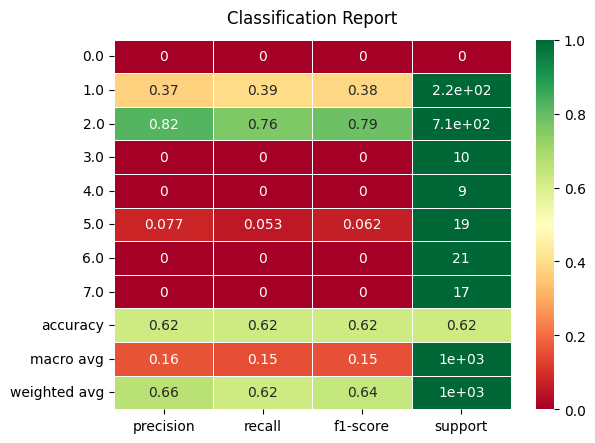

In [134]:
df_awe = pd.read_csv('output/covertype_awe_prequential.csv', index_col=0)
predicted_Y_awe = df_awe['predicted_value_[AWE]'].to_numpy()
true_Y = df_awe['true_value'].to_numpy()

metrics_gnb, g = show_classification_report(predicted_Y_awe, true_Y)

g.figure.savefig('output/awe_partial_50k.png', dpi=300, bbox_inches='tight')

## Dynamic Weighted Majority (Naive Bayes)

In [128]:
from skmultiflow.meta.dynamic_weighted_majority import DynamicWeightedMajorityClassifier
from skmultiflow.bayes import NaiveBayes

cls_dwm = DynamicWeightedMajorityClassifier(n_estimators=5, base_estimator=NaiveBayes(), period=100)

In [129]:
stream = hyperplane_stream
stream.restart()

X, y = stream.next_sample(5000)
cls_dwm.partial_fit(X, y, classes=stream.target_values)

evaluator = EvaluatePrequential(
    max_samples=100000,
    max_time=1800,
    show_plot=False,
    n_wait=100,
    restart_stream=False,
    metrics=['accuracy', 'precision', 'gmean', 'recall', 'f1', 'true_vs_predicted'],
    data_points_for_classification=True,
    output_file='output/covertype_dwm_prequential.csv'
)

evaluator.evaluate(stream=stream, model=cls_dwm, model_names=['DWM'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [86.23s]
Processed samples: 100000
Mean performance:
DWM - Accuracy     : 0.9333
DWM - Precision: 0.9335
DWM - Recall: 0.9334
DWM - F1 score: 0.9335


[DynamicWeightedMajorityClassifier(base_estimator=NaiveBayes(nominal_attributes=None),
                                   beta=0.5, n_estimators=5, period=100,
                                   theta=0.01)]

Gmean:  0.9120317774801712
              precision    recall  f1-score   support
0.0            0.906746  0.917671  0.912176   498.000
1.0            0.917339  0.906375  0.911824   502.000
accuracy       0.912000  0.912000  0.912000     0.912
macro avg      0.912042  0.912023  0.912000  1000.000
weighted avg   0.912064  0.912000  0.911999  1000.000


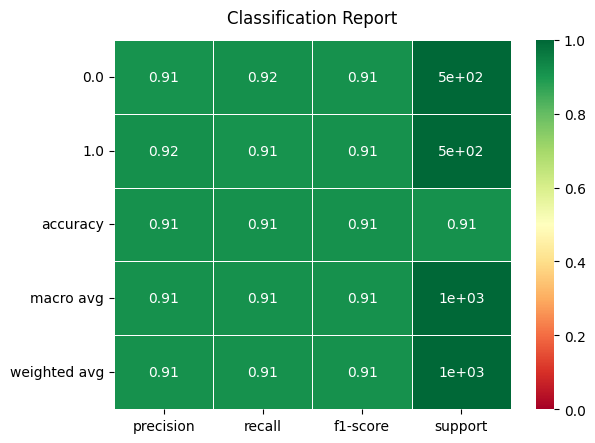

In [132]:
df_dwm = pd.read_csv('output/covertype_dwm_prequential.csv', index_col=0)
predicted_Y_dwm = df_dwm['predicted_value_[DWM]'].to_numpy()
true_Y = df_dwm['true_value'].to_numpy()

metrics_gnb, g = show_classification_report(predicted_Y_dwm, true_Y)

g.figure.savefig('output/dwm_partial_100k_hyperplane.png', dpi=300, bbox_inches='tight')

#### SEA Generator Drift Analysis

e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide

Warning zone has been detected in data: 696 - of index: 696
Warning zone has ended in data: 703 - of index: 703
Warning zone has been detected in data: 705 - of index: 705
Warning zone has ended in data: 721 - of index: 721
Change has been detected in data: 721 - of index: 721


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide

Warning zone has been detected in data: 1787 - of index: 1787
Warning zone has ended in data: 1788 - of index: 1788
Warning zone has been detected in data: 1791 - of index: 1791
Warning zone has ended in data: 1796 - of index: 1796
Warning zone has been detected in data: 1821 - of index: 1821
Warning zone has ended in data: 1853 - of index: 1853
Warning zone has been detected in data: 1854 - of index: 1854
Warning zone has ended in data: 1868 - of index: 1868
Change has been detected in data: 1868 - of index: 1868


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide

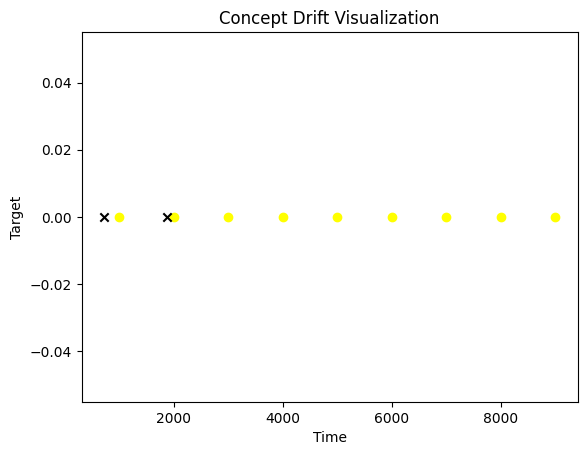

              precision    recall  f1-score     support
1              0.137500  1.000000  0.241758   1375.0000
2              0.000000  0.000000  0.000000   1462.0000
3              0.000000  0.000000  0.000000   1262.0000
4              0.000000  0.000000  0.000000   1620.0000
5              0.000000  0.000000  0.000000   1583.0000
6              0.000000  0.000000  0.000000   1349.0000
7              0.000000  0.000000  0.000000   1349.0000
accuracy       0.137500  0.137500  0.137500      0.1375
macro avg      0.019643  0.142857  0.034537  10000.0000
weighted avg   0.018906  0.137500  0.033242  10000.0000


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [17]:
from skmultiflow.drift_detection import DDM, ADWIN
from skmultiflow.drift_detection.eddm import EDDM
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
from sklearn.metrics import classification_report

sea_stream.reset()

drift_detector = DDM(warning_level=2.8, min_num_instances=50) 
clf = GaussianNB()
clf2 = AccuracyWeightedEnsembleClassifier(n_estimators = 10, base_estimator = GaussianNB(), n_splits=None)

N_SAMPLES = 10000
curr_samples = 0
actual_drift_points = [1000 * n for n in range(1, 10)]
guessed_predictions = []
drift_points = []
features = [[] for _ in range(54)]
targets = []
last_X_window = []
last_y_window = []

X, y = covertype_stream.next_sample(1)
clf.partial_fit(X, y, classes=[i+1 for i in range(7)])
in_warning_zone = False

sea_stream.generate_drift()

while curr_samples < N_SAMPLES and covertype_stream.has_more_samples():
    #if curr_samples in actual_drift_points:
    #    sea_stream.generate_drift()

    X, y = covertype_stream.next_sample()

    prediction = clf.predict(X)

    guessed_predictions.append(prediction[0])

    for i in range(54):
        features[i].append(X[0][i])
    targets.append(y[0])
    drift_detector.add_element(1 - int(y[0] == prediction[0]))
    if not in_warning_zone and drift_detector.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        in_warning_zone = True
    elif in_warning_zone and not drift_detector.detected_warning_zone():
        print('Warning zone has ended in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        in_warning_zone = False
    if drift_detector.detected_change():
        print('Change has been detected in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        # clf = GaussianNB()
        # clf.partial_fit(np.array(last_X_window).reshape(-1, 54), np.array(last_y_window).reshape(len(last_y_window)), classes=[i+1 for i in range(7)])
        
        drift_points.append(curr_samples)


    last_X_window.append(X)
    last_y_window.append(y)

    clf.partial_fit(X, y)

    if len(last_X_window) > 500:
        last_X_window.pop(0)
        last_y_window.pop(0)
    
    curr_samples += 1

kwargs = {'Feature ' + str(i): features[i] for i in range(54)}
df = pd.DataFrame(kwargs)
df.head()

plt.scatter(actual_drift_points, [0 for i in actual_drift_points], color='yellow', marker='o')
plt.scatter(drift_points, [0 for i in drift_points], color='black', marker='x')
plt.xlabel('Time')
plt.ylabel('Target')
plt.title('Concept Drift Visualization')
plt.show()

metrics = classification_report(targets, guessed_predictions, target_names=[str(i+1) for i in range(7)], output_dict=True)
print(pd.DataFrame(metrics).transpose())

In [ ]:

from streams import *
from skmultiflow.data import ConceptDriftStream
from skmultiflow.data import HyperplaneGenerator
from skmultiflow.data import LEDGeneratorDrift

stream = build_data_stream('covtype')


#### Create the ensemble

In [4]:
from ensemble import build_premade_ensemble, build_custom_ensemble
from sklearn.naive_bayes import GaussianNB

ensemble = build_premade_ensemble('batch', 10, GaussianNB())

#### Utilize drift detection methods

#### Evaluate

In [1]:
from skmultiflow.evaluation import EvaluatePrequential

evaluator = EvaluatePrequential(
    n_wait = 10,
    max_samples = 100,
    show_plot = False,
    metrics=['accuracy', 'running_time', 'accuracy', 'precision', 'gmean'],
    data_points_for_classification=False
)

evaluator.evaluate(stream=sea_stream, model=[ensemble], model_names=['ensemble'])

NameError: name 'sea_stream' is not defined